# Packages

In [1]:
import os
import matplotlib.pyplot as plt
import random
import shutil
import numpy as np
from PIL import Image
import tensorflow as tf

In [2]:
from os import listdir

#Dataset download

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fakhrealam9537/leaf-disease-segmentation-dataset")

print("Path to dataset files:", path)

100%|██████████| 503M/503M [00:04<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4


In [4]:
dataset_path="/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data"

In [5]:
os.listdir(dataset_path)

['masks', 'images']

In [6]:
image_dir=os.path.join(dataset_path, "images")
mask_dir=os.path.join(dataset_path, "masks")



------------------1-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00110_2.jpg


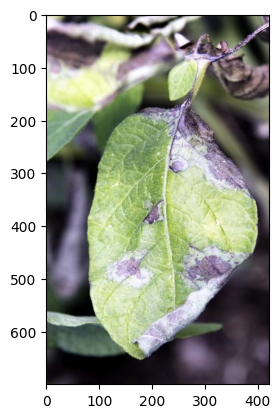

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00110_2.png


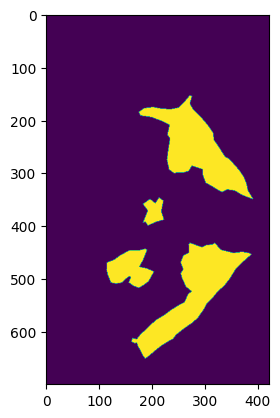



------------------2-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00074_0.jpg


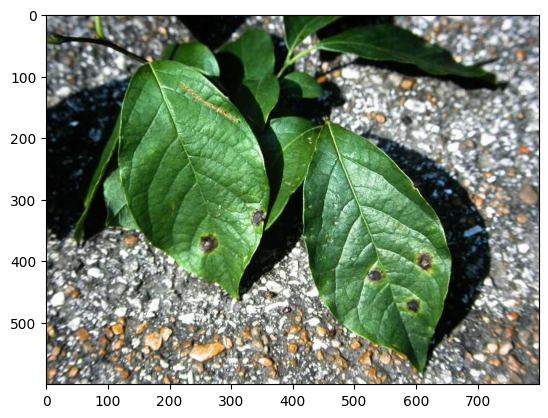

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00074_0.png


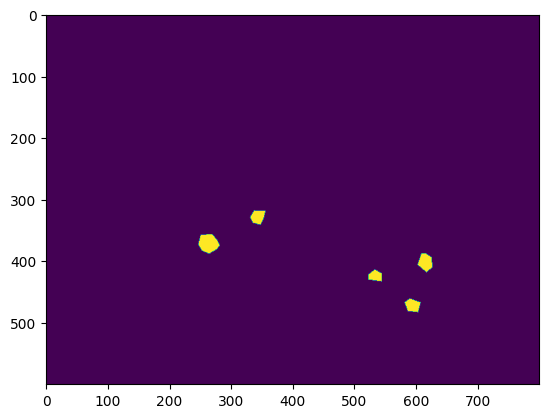



------------------3-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00571_0.jpg


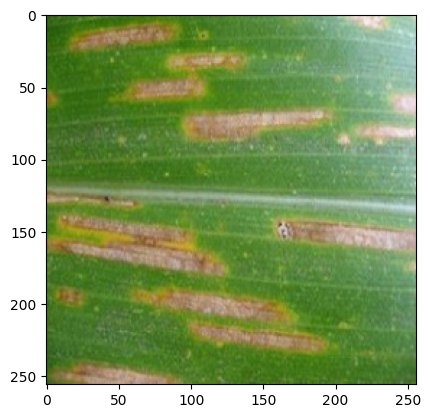

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00571_0.png


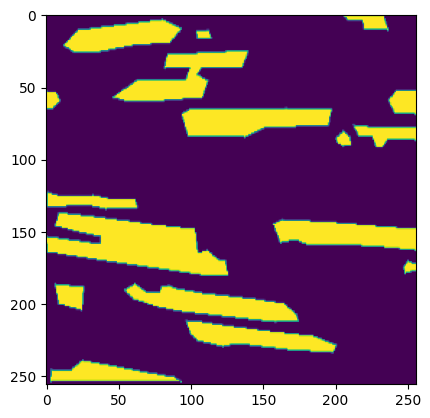



------------------4-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00485_1.jpg


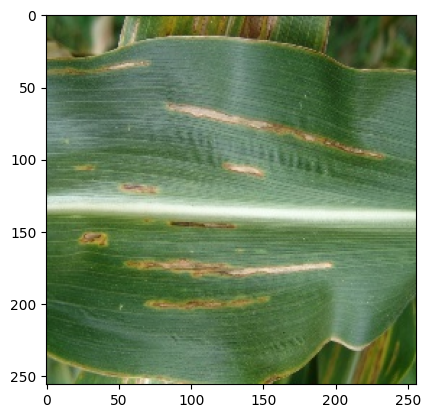

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00485_1.png


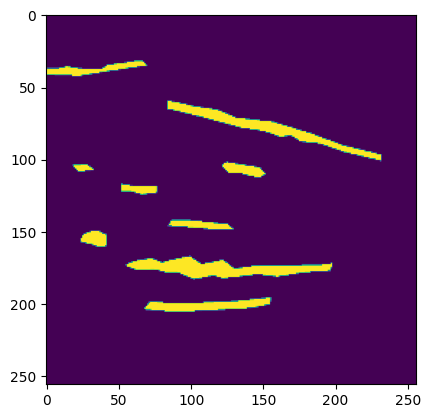

In [7]:
#Display some images
for i in range(4):
  image_path=image_dir +'/'+os.listdir(image_dir)[i]
  mask_path=mask_dir +'/'+os.path.splitext(os.listdir(image_dir)[i])[0]+".png"


  image=Image.open(image_path)
  mask=Image.open(mask_path)

  print(f"\n\n------------------{i+1}-----------------------")
  print(image_path)
  plt.imshow(image)
  plt.show()


  print(mask_path)
  plt.imshow(mask)
  plt.show()


# Data Seperation

In [8]:
train_images_dir=os.makedirs("train_images", exist_ok=True)
train_masks_dir=os.makedirs("train_masks", exist_ok=True)

In [9]:
val_images_dir=os.makedirs("val_images", exist_ok=True)
val_masks_dir=os.makedirs("val_masks", exist_ok=True)

In [10]:
test_images_dir=os.makedirs("test_images", exist_ok=True)
test_masks_dir=os.makedirs("test_masks", exist_ok=True)

In [11]:
dataset_length=len(os.listdir(image_dir))
print(dataset_length)

2940


In [12]:
train_images_number=int(dataset_length*0.6)
print("Number of images for train :",train_images_number)

Number of images for train : 1764


In [13]:
val_images_number=int(dataset_length*0.2)
print("Number of images for validation :",val_images_number)

Number of images for validation : 588


In [14]:
test_images_number=int(dataset_length*0.2)
print("Number of images for test :",test_images_number)

Number of images for test : 588


In [15]:
# List all image and mask files
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

In [16]:
#shuffle
random.shuffle(image_files)
random.shuffle(mask_files)

In [17]:
image_files[0]

'00401_4.jpg'

In [18]:
#copy images for train
for i in range(train_images_number):

  shutil.copy(os.path.join(image_dir, image_files[i]), "/content/train_images")
  shutil.copy(os.path.join(mask_dir, os.path.splitext(image_files[i])[0]+".png"),"/content/train_masks")

In [19]:
len(os.listdir("/content/train_images"))
len(os.listdir("/content/train_masks"))

1764

In [20]:
#copy images for val
for i in range(train_images_number, train_images_number + val_images_number):

  shutil.copy(os.path.join(image_dir, image_files[i]), "/content/val_images")
  shutil.copy(os.path.join(mask_dir, os.path.splitext(image_files[i])[0]+".png"),"/content/val_masks")

In [21]:
len(os.listdir("/content/val_images"))
len(os.listdir("/content/val_masks"))

588

In [22]:
#copy images for test
for i in range(train_images_number + val_images_number, train_images_number + 2*val_images_number): #because val images number = test images number

  shutil.copy(os.path.join(image_dir, image_files[i]), "/content/test_images")
  shutil.copy(os.path.join(mask_dir, os.path.splitext(image_files[i])[0]+".png"),"/content/test_masks")

In [23]:
len(os.listdir("/content/test_images"))
len(os.listdir("/content/test_masks"))

588

# Preprocessing

In [24]:
seed = 29
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [25]:
#Train images
train_images = np.zeros((train_images_number, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
train_masks = np.zeros((train_images_number, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

for i in range(train_images_number):

  #preprocessing about images
  image = np.array(Image.open(os.path.join("/content/train_images", os.listdir("/content/train_images")[i])))
  image= np.resize(image,(IMG_HEIGHT, IMG_WIDTH, 3))
  image = (image - 0) /255
  train_images[i] = image


  #preprocessing about masks
  mask=np.array(Image.open(os.path.join("/content/train_masks", os.path.splitext(os.listdir("/content/train_images")[i])[0]+".png")).convert("L"))
  mask= np.resize(mask,(IMG_HEIGHT,IMG_WIDTH,1))
  mask = (mask - 0) /255
  train_masks[i] = mask


In [26]:
#Val images
val_images = np.zeros((train_images_number, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
val_masks = np.zeros((train_images_number, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

for i in range(val_images_number):

  #preprocessing about images
  image = np.array(Image.open(os.path.join("/content/val_images", os.listdir("/content/val_images")[i])))
  image= np.resize(image,(IMG_HEIGHT, IMG_WIDTH, 3))
  image = (image - 0) /255
  val_images[i] = image


  #preprocessing about masks
  mask=np.array(Image.open(os.path.join("/content/val_masks", os.path.splitext(os.listdir("/content/val_images")[i])[0]+".png")).convert("L"))
  mask= np.resize(mask,(IMG_HEIGHT,IMG_WIDTH,1))
  mask = (mask - 0) /255
  val_masks[i] = mask


In [27]:
# test images
test_images = np.zeros((test_images_number, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
test_masks = np.zeros((test_images_number, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

for i in range(val_images_number):

  #preprocessing about images
  image = np.array(Image.open(os.path.join("/content/test_images", os.listdir("/content/test_images")[i])))
  image= np.resize(image,(IMG_HEIGHT, IMG_WIDTH, 3))
  image = (image - 0) /255
  val_images[i] = image


  #preprocessing about masks
  mask=np.array(Image.open(os.path.join("/content/test_masks", os.path.splitext(os.listdir("/content/test_images")[i])[0]+".png")).convert("L"))
  mask= np.resize(mask,(IMG_HEIGHT,IMG_WIDTH,1))
  mask = (mask - 0) /255
  val_masks[i] = mask


# Model Unet

In [28]:
tf.random.set_seed(6)

In [29]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

#Contraction
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
c1 = tf.keras.layers.Dropout(0.5)(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
c2 = tf.keras.layers.Dropout(0.5)(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
c3 = tf.keras.layers.Dropout(0.5)(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
c4 = tf.keras.layers.Dropout(0.5)(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
c5 = tf.keras.layers.Dropout(0.5)(c5)



#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2))(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
c6 = tf.keras.layers.Dropout(0.5)(c6)


u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2))(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
c7 = tf.keras.layers.Dropout(0.5)(c7)


u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2))(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c8)
c8 = tf.keras.layers.Dropout(0.5)(c8)


u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2))(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c9)
c9 = tf.keras.layers.Dropout(0.5)(c9)


outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)


In [30]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['conv2d[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d_1[0][0]']            
                                                                                              

In [31]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Leaf_segmentation.keras', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [32]:
history = model.fit(train_images, train_masks,
                    batch_size=20,
                    epochs=20,
                    validation_data=(val_images, val_masks),
                    callbacks=callbacks)

Epoch 1/20
89/89 [==============================] - 47s 476ms/step - loss: 0.3364 - accuracy: 0.9302 - val_loss: 0.1778 - val_accuracy: 0.9744
Epoch 2/20
89/89 [==============================] - 40s 455ms/step - loss: 0.2787 - accuracy: 0.9327 - val_loss: 0.1289 - val_accuracy: 0.9744
Epoch 3/20
89/89 [==============================] - 41s 457ms/step - loss: 0.2730 - accuracy: 0.9327 - val_loss: 0.1411 - val_accuracy: 0.9744
Epoch 4/20
89/89 [==============================] - 41s 465ms/step - loss: 0.2722 - accuracy: 0.9327 - val_loss: 0.1369 - val_accuracy: 0.9744
Epoch 5/20
89/89 [==============================] - 41s 460ms/step - loss: 0.2711 - accuracy: 0.9327 - val_loss: 0.1416 - val_accuracy: 0.9744
Epoch 6/20
89/89 [==============================] - 40s 449ms/step - loss: 0.2680 - accuracy: 0.9327 - val_loss: 0.1438 - val_accuracy: 0.9744
Epoch 7/20
89/89 [==============================] - 40s 449ms/step - loss: 0.2701 - accuracy: 0.9327 - val_loss: 0.1317 - val_accuracy: 0.9744

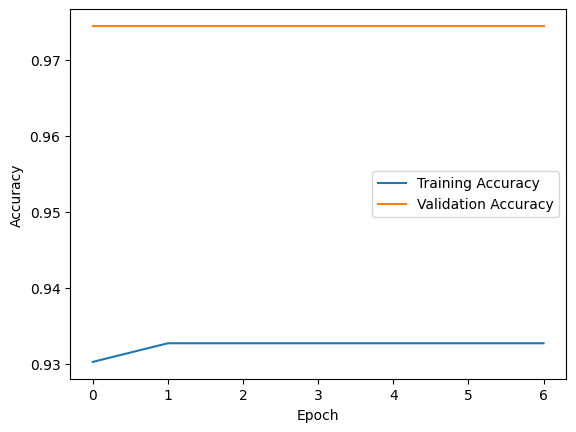

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
unetacc = history.history['accuracy'][-1]

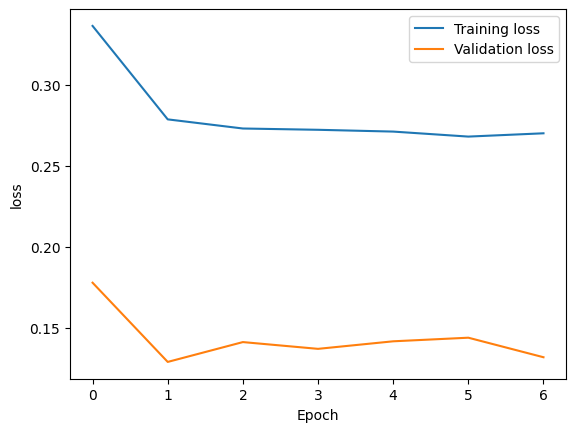

In [34]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
unetacc = history.history['loss'][-1]

In [35]:
#Evaluation
loss, metrics = model.evaluate(test_images, test_masks, batch_size=20)


30/30 [==============================] - 2s 52ms/step - loss: 0.0628 - accuracy: 1.0000


In [36]:
(loss, metrics)

(0.06280110031366348, 1.0)

In [37]:
# Sauvegarde du modèle complet
model.save('Leaf_segmentation.keras')
